In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.1
b2 = 0.2

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 1/2
x2 = 2.0
y2 = 1/2

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 1500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('Ejemplo2_4.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], sep=" ", end="\n", file=f)

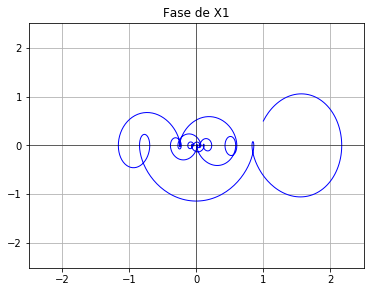

In [8]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig, xlim, ylim
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

#xlabel('t')
grid(True)
#hold(True)
lw = 1

xlim(-2.5,2.5)
ylim(-2.5,2.5)

plot(x1, xy, 'b', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Fase de X1')
savefig('Ejemplo2_4-A.png', dpi=100)

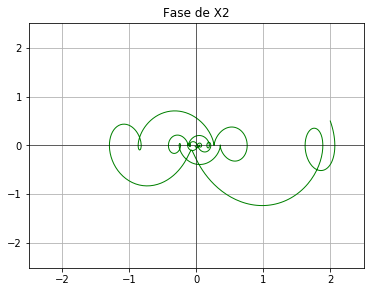

In [13]:
#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

#xlabel('t')
grid(True)
#hold(True)
lw = 1

xlim(-2.5,2.5)
ylim(-2.5,2.5)

plot(x2, y2, 'g', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Fase de X2')
savefig('Ejemplo2_4-B.png', dpi=100)

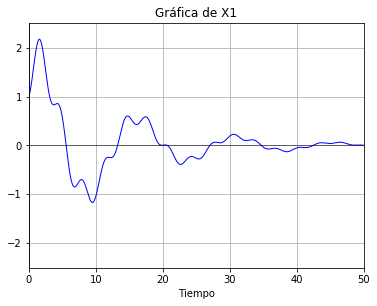

In [19]:
#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('Tiempo')
grid(True)
#hold(True)
lw = 1

xlim(0,50)
ylim(-2.5,2.5)

plot(t, x1, 'b', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de X1')
savefig('Ejemplo2_4-C.png', dpi=100)

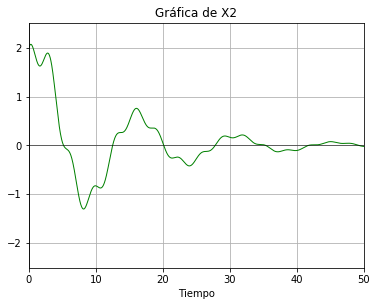

In [21]:
#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('Tiempo')
grid(True)
#hold(True)
lw = 1

xlim(0,50)
ylim(-2.5,2.5)

plot(t, x2, 'g', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Gráfica de X2')
savefig('Ejemplo2_4-D.png', dpi=100)

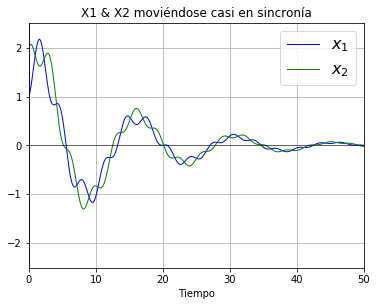

In [25]:
#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('Tiempo')
grid(True)
#hold(True)
lw = 1

xlim(0,50)
ylim(-2.5,2.5)

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('X1 & X2 moviéndose casi en sincronía')
savefig('Ejemplo2_4-E.png', dpi=100)

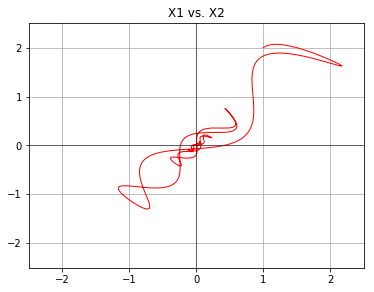

In [29]:
#Genera la gráfica en el archivo
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('Ejemplo2_4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

#xlabel('t')
grid(True)
#hold(True)
lw = 1

xlim(-2.5,2.5)
ylim(-2.5,2.5)

plot(x1, x2, 'r', linewidth=lw)
#plot(t, x2, 'g', linewidth=lw)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

#legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('X1 vs. X2')
savefig('Ejemplo2_4-F.png', dpi=100)